<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/Machine_learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd 
import plotly.express as px
import numpy as np 
import sklearn
import matplotlib.pyplot as plt

#Data reading 

In [14]:
data = pd.read_csv("Mall_Customers.csv")

In [15]:
data.shape

(200, 5)

In [17]:
data.columns = data.columns.str.replace(' ','_')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
px.scatter(data, x = "CustomerID", y = "Age", color = "Genre")

In [18]:
px.scatter(data, x = "CustomerID", y = "Annual_Income_(k$)", color = "Genre")

In [19]:
px.scatter(data, x = "CustomerID", y = "Spending_Score_(1-100)", color = "Genre")

In [33]:
feature = data.drop(columns = ["Genre","CustomerID","Age"]).values
target = data.Genre.values

In [ ]:
feature, target

In [35]:
from sklearn.cluster import KMeans

In [36]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(feature)
  wcss.append(kmeans.inertia_)

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636,
 19672.072849014323,
 17887.084456628647,
 15917.609689427862,
 14312.668609168608,
 12802.791660300485,
 11702.173889998889,
 11220.225086188322,
 9915.625216450215,
 9221.456954398258,
 8911.441346032136]

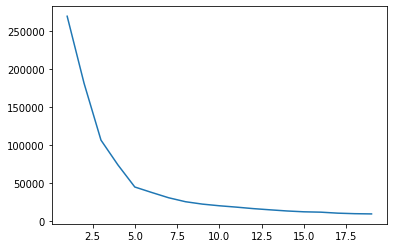

In [42]:
plt.plot(range(1,20),wcss)

In [44]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_pred = kmeans.fit_predict(feature)

In [49]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [54]:
data["y_pred"] = pd.Series(y_pred)
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [79]:
from os import name
fig = px.scatter(data, x ="Annual_Income_(k$)",
                 y = "Spending_Score_(1-100)", color = data.y_pred.astype(str))
fig.add_scatter(x = kmeans.cluster_centers_[:,0],
                y = kmeans.cluster_centers_[:,1],name = "Centroids")
fig.update_layout(
    legend=dict(yanchor="top", y=1, xanchor="right", x=1)
)
fig.show()


In [82]:
from os import name
fig = px.scatter(data, x ="Annual_Income_(k$)",
                 y = "Spending_Score_(1-100)", color = data.y_pred,
                 color_continuous_scale="Blackbody")
fig.add_scatter(x = kmeans.cluster_centers_[:,0],
                y = kmeans.cluster_centers_[:,1],name = "Centroids")
fig.update_layout(
    legend=dict(yanchor="top", y=1, xanchor="right", x=1)
)
fig.show()

In [83]:
fig_all_color_scale = px.colors.sequential.swatches_continuous()
fig_all_color_scale.show()